In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm

In [33]:
def dft_freq_phase(xn, N):
    res = []
    for k in range(0, N):
        sum = 0
        for i in range(0, N):
            sum += xn[i] * np.exp(-1j * 2 * np.pi * i * k / N)
        res.append(sum)

    freq = np.fft.fftfreq(N)
        
    xn_phase = []
    for i in range(0, N):
        xn_phase.append(cm.phase(res[i]))
    
    return {
        "dft": res,
        "freq": freq,
        "phase": xn_phase
    }

## Question 1

Compute the 8-point DFT of the following sequences. Plot the magnitude 
	and phase spectrum. Observe the symmetry properties
	
	a.  $x[n] = \{1,1,0,0,0,0,0,1\}$
	b. $x[n] = \{0,1,1,0,0,0,-1,-1\}$

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  import sys
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning

<StemContainer object of 3 artists>

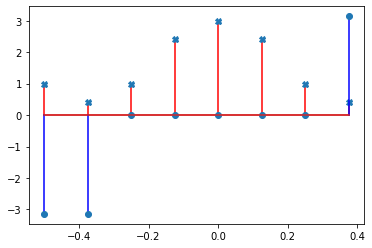

In [3]:
x1 = [1,1,0,0,0,0,0,1]
x2 = [0,1,1,0,0,0,-1,-1]
N = 8

x1_dft = dft_freq_phase(x1,N)

plt.stem(x1_dft["freq"], np.abs(x1_dft["dft"]), linefmt = 'R', markerfmt = 'X')

plt.stem(x1_dft["freq"], x1_dft["phase"], linefmt = 'B')

## Question 2

Generate the finite duration sequence $x[n]= 0.5 (1-\cos(\pi n/20))$, $0\leq n <20$.  

      a.  Append the sequence with sufficient number of zeros to compute the DFT of the sequence with length              N=32 and 256. Plot the DFT and comment on the effects of zero padding.
        
	b.  Insert 16 zeros in the middle of the sequence and perform a DFT with N=32.
	Note the difference in the spectrum
        
	c.  Insert 16 zeros in the beginning of the sequence and repeat.


/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


<StemContainer object of 3 artists>

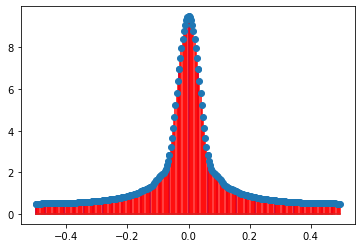

In [4]:
n = 20

N1 = 32
N2 = 256

def xa(N):
    res = []
    for i in range(0, n):
        res.append(0.5 * (1 - np.cos(np.pi * i / 20)))
    for i in range(n, N):
        res.append(0)
    return res

plt.stem(dft_freq_phase(xa(N1), N1)["freq"], np.abs(dft_freq_phase(xa(N1), N1)["dft"]), linefmt = 'B')
plt.stem(dft_freq_phase(xa(N2), N2)["freq"], np.abs(dft_freq_phase(xa(N2), N2)["dft"]), linefmt = 'R')

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

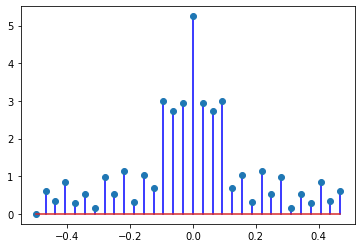

In [5]:
def xb(N):
    res = []
    for i in range(0, int(n/2)):
        res.append(0.5 * (1 - np.cos(np.pi * i / 20)))
    for i in range(int(n/2), int(n/2) + 16):
        res.append(0)
    for i in range(int(n/2) + 16, N):
        res.append(0.5 * (1 - np.cos(np.pi * i / 20)))
    return res

plt.stem(dft_freq_phase(xb(N1), N1)["freq"], np.abs(dft_freq_phase(xb(N1), N1)["dft"]), linefmt = 'B')

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<StemContainer object of 3 artists>

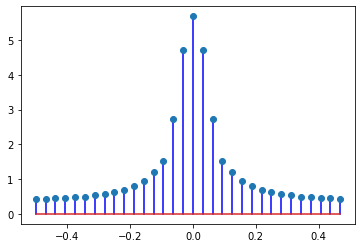

In [6]:
def xc(N):
    res = []
    for i in range(0, 16):
        res.append(0)
    for i in range(0, n):
        res.append(0.5 * (1 - np.cos(np.pi * i / 20)))
    return res

plt.stem(dft_freq_phase(xc(N1), N1)["freq"], np.abs(dft_freq_phase(xc(N1), N1)["dft"]), linefmt = 'B')

## Question 3

Plot the $32$ point DFT of the following signals and comment on
	the spectral estimate.
	
	a. $x[n] = \cos (3\pi n / 8 )$
	b. $x[n] = \cos (3\pi n / 16)$
	c. $x[n] = \cos (3\pi n / 17)$


/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<StemContainer object of 3 artists>

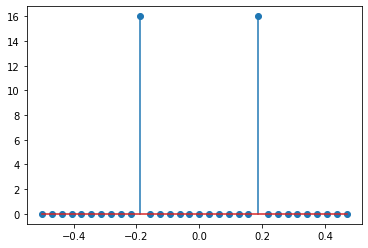

In [7]:
x1n = []
N = 32

for i in range(0, N):
    x1n.append(np.cos(3 * np.pi * i / 8))
    
x1n_dft = dft_freq_phase(x1n, N)

plt.stem(x1n_dft["freq"], np.abs(dft_freq_phase(x1n, N)["dft"]))

# Comment:

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

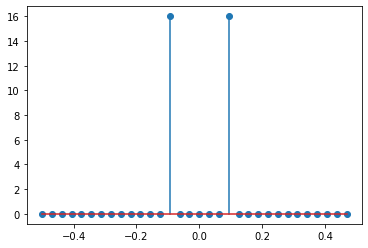

In [8]:
x2n = []

for i in range(0, N):
    x2n.append(np.cos(3 * np.pi * i / 16))
    
x2n_dft = dft_freq_phase(x2n, N)

plt.stem(x2n_dft["freq"], np.abs(dft_freq_phase(x2n, N1)["dft"]))

# Comment:

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

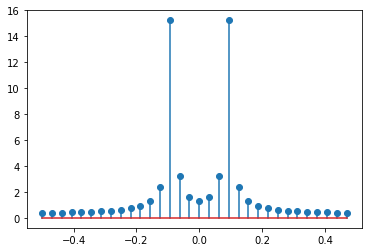

In [9]:
x3n = []

for i in range(0, N):
    x3n.append(np.cos(3 * np.pi * i / 17))
    
x3n_dft = dft_freq_phase(x3n, N)

plt.stem(x3n_dft["freq"], np.abs(dft_freq_phase(x3n, N)["dft"]))

# Comment:

## Question 4

Estimation of signal corrupted by noise: 
	Generate the signal $ s[n] = \cos(\pi 5 n/32) + \cos(\pi 21 n/64)$ for 
	256 samples.  Generate a noisy version of the signal $x[n]$ by adding 
	white gaussian noise $e[n]$ with variance $0.3$ (use function {\em randn} 
	to generate the noise) to the original signal $s[n]$. Compute the energy 
	in the error signal $\sum_n (x[n] - s[n])^2$.
	

a. Plot the 256 point DFTs $S[k]$ and $X[k]$. Find the set 
	$\mathcal{S}_{nz}$ of the values of $k$ for which $S[k]$ is non-zero.
	Find $\hat{X}[k] = X[k]$ if $k\in \mathcal{S}_{nz}$
	and zero otherwise.  
    
   b. Find the IDFT $\hat{x}[n]$ from $\hat{X}[k]$ to 
      recover the original signal.  Plot $\hat{x}[n]$.  Find the error signal 
	 energy after recovery $\sum_n (\hat{x}[n] - s[n])^2$
	

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

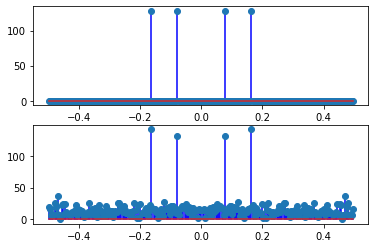

In [10]:
s = []
n = []
x = [] 
N = 256
energy = 0

n = np.random.randn(N)

for i in range(0, N):
    s.append(np.cos(np.pi * 5 * i / 32) + np.cos(np.pi * 21 * i / 64))
    x.append(s[i]+n[i])
    energy += (x[i] - s[i])**2

s_dft = dft_freq_phase(s,N)
x_dft = dft_freq_phase(x,N)

plt.subplot(2,1,1)
plt.stem(s_dft["freq"], np.abs(s_dft["dft"]), linefmt = 'B')
plt.subplot(2,1,2)
plt.stem(x_dft["freq"], np.abs(x_dft["dft"]), linefmt = 'B')

/home/dsdlab/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Old Noise Energy = 228.67851502491487, new Noise Energy = 2.6548485815754785e-26


[20, 42, 214, 236]

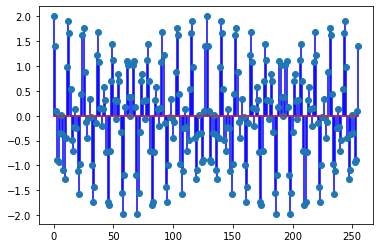

In [11]:
xhat = []
snz = []
newEnergy = 0

for i in range(0,N):
    if(np.real(s_dft["dft"])[i] >= 10**-10):
        snz.append(i)
        
for i in range(0,N):
    if i in snz:
        xhat.append(s_dft["dft"][i])
        continue
    else:
        xhat.append(0)
    
xn = np.fft.ifft(xhat)
# np.abs(s_dft["dft"])
plt.stem(range(N), xn, linefmt = 'B')

for i in range(N):
    newEnergy += (np.real(xn)[i]-s[i])**2
    
print(f'Old Noise Energy = {energy}, new Noise Energy = {newEnergy}')
snz

## Question 5

Consider the sequence $x[n]=n$ for $0 \leqslant n \leqslant 8$, compute and plot N-point DFT of $x[n]$ for 
	$N=5, 8,$ and $16$. Also, compute and plot IDFT of these N-DFT's for the values $n=-25:25$. Make out
	the inferences which carry marks. (Use summuation formula to do this problem) 

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


<StemContainer object of 3 artists>

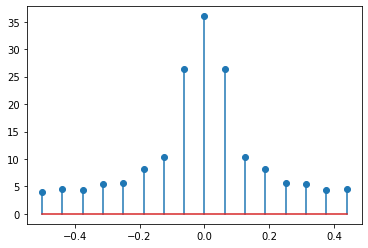

In [27]:
def xn(lower_limit, upper_limit):
    res = []
    for i in range(lower_limit, 9):
        res.append(i)
    if upper_limit > 8:
        for i in range(9, upper_limit + 1):
            res.append(0)
    return res

N = 16
x1_dft = dft_freq_phase(xn(0, N), N)
plt.stem(x1_dft["freq"], np.abs(x1_dft["dft"]))

# x = []
# for i in range(0,9):
#     x.append(i)

# N = 5
# x_dft = dft_freq_phase(x,N)
# plt.stem(x_dft["freq"], np.abs(x_dft["dft"]))

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

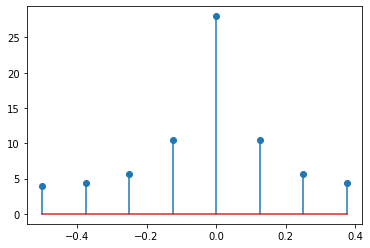

In [28]:
N = 8
x1_dft = dft_freq_phase(xn(0,N), N)
plt.stem(x1_dft["freq"], np.abs(x1_dft["dft"]))

# N = 8
# x_dft = dft_freq_phase(x,N)
# plt.stem(x_dft["freq"], np.abs(x_dft["dft"]))

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

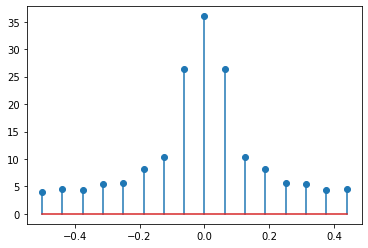

In [29]:
N = 16
x1_dft = dft_freq_phase(xn(0,N), N)
plt.stem(x1_dft["freq"], np.abs(x1_dft["dft"]))

# N = 16
# x_dft = dft_freq_phase(x,N)
# plt.stem(x_dft["freq"], np.abs(x_dft["dft"]))

/home/dsdlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/home/dsdlab/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/dsdlab/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/dsdlab/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order

<StemContainer object of 3 artists>

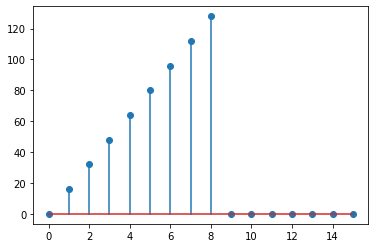

In [37]:
def idft(xn, N):
    res = []
    for k in range(0, N):
        sum = 0
        for i in range(0, N):
            sum += xn[i] * np.exp(+1j * 2 * np.pi * i * k / N)
        res.append(sum)
        
    return res

kb = idft(x1_dft["dft"],N)
plt.stem(kb)

## Question 6

Generate the $8 \times 8$ DFT Matrix, and show that the Normalized DFT matrix is Unitary Matrix.  

In [16]:
n = 8
dft_matrix = []
dft_conj = []

for i in range(0, n):
    loop_res = []
    for k in range(0, n):
        loop_res.append((1 / np.sqrt(n)) * np.exp(-2 * np.pi * 1j * i * k / n))
    dft_conj.append(np.conjugate(loop_res))
    dft_matrix.append(loop_res)
    
unitary = np. multiply(dft_matrix, dft_conj)
unitary

# Since the obtained matrix [unitary] has all elements equal to 1/8, the Normalized DFT matrix is a unitary matrix.

array([[0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j],
       [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j],
       [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j],
       [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j],
       [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j],
       [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j],
       [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j],
       [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
        0.125+0.j, 0.125+0.j]])

## Question 7

Find the Linear convolution between the following sequences

	a. $x[n] = \{\textbf{1},3,-2,1\}$ 
	b. $h[n] = \{\textbf{1},1\}$
		

using the Circualr convolution.

In [17]:
xn = [1, 3, -2, 1, 0] # Zero Padding to make the output length = L+M-1
hn = [1, 1]

# for generating the circular matrix
def shifter(matrix):
    last = matrix[len(matrix)-1]
    x = len(matrix)
    result = [0] * x
    for i in range(1,len(matrix)):
        result[i] = matrix[i-1]
    result[0] = last
    return result

#  finding the circular convolution
def findCircularConvolution(x,h,n,m):
    primary_matrix = np.zeros((max(n,m),max(n,m)))
    for i in range(0,len(primary_matrix[0])):
        primary_matrix[0][i] = x[i]
    for i in range(1,max(n,m)):
        primary_matrix[i] = shifter(primary_matrix[i-1])
        ultimate_matrix = np.transpose(primary_matrix)
    difference_in_length = abs(n-m)
    for i in range(m,m+difference_in_length):
        h.append(0)
    resultant = np.dot(ultimate_matrix,h)
    return resultant

circular_convolution_result = findCircularConvolution(xn,hn,len(xn),len(hn))
print(circular_convolution_result)

[ 1.  4.  1. -1.  1.]


## Question 8

Find the Linear convolution between the following sequences 

 a. $x[n] = \{1,1,0,0,0,0,0,1\}$
 b. $h[n] = \{0,1,1,0,0,0,-1,-1,-1\}$

using DFT Method. (Use FFT command to do this.)


In [18]:
xn = [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
hn = [0, 1, 1, 0, 0, 0, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0]

yk = np.multiply(np.fft.fft(hn), np.fft.fft(xn))
yk_idft = np.fft.ifft(yk)

yk_idft

array([-5.55111512e-17+0.00000000e+00j,  1.00000000e+00+5.07326818e-18j,
        2.00000000e+00+0.00000000e+00j,  1.00000000e+00-3.79021120e-17j,
       -2.77555756e-17+0.00000000e+00j,  0.00000000e+00-3.28288438e-17j,
       -1.00000000e+00+0.00000000e+00j, -2.00000000e+00+1.01465364e-17j,
       -1.00000000e+00+0.00000000e+00j,  1.11022302e-16+5.07326818e-18j,
       -1.11022302e-16+0.00000000e+00j,  0.00000000e+00+1.76090393e-17j,
       -2.77555756e-17+0.00000000e+00j, -1.00000000e+00+2.26823074e-17j,
       -1.00000000e+00+0.00000000e+00j, -1.00000000e+00+1.01465364e-17j])

In [19]:
z = np.convolve(xn,hn)
z

array([ 0,  1,  2,  1,  0,  0, -1, -2, -1,  0,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [20]:
help(np.fft.ifft)

Help on function ifft in module mkl_fft._numpy_fft:

ifft(a, n=None, axis=-1, norm=None)
    Compute the one-dimensional inverse discrete Fourier Transform.
    
    This function computes the inverse of the one-dimensional *n*-point
    discrete Fourier transform computed by `fft`.  In other words,
    ``ifft(fft(a)) == a`` to within numerical accuracy.
    For a general description of the algorithm and definitions,
    see `numpy.fft`.
    
    The input should be ordered in the same way as is returned by `fft`,
    i.e.,
    
    * ``a[0]`` should contain the zero frequency term,
    * ``a[1:n//2]`` should contain the positive-frequency terms,
    * ``a[n//2 + 1:]`` should contain the negative-frequency terms, in
      increasing order starting from the most negative frequency.
    
    Parameters
    ----------
    a : array_like
        Input array, can be complex.
    n : int, optional
        Length of the transformed axis of the output.
        If `n` is smaller than the length

In [21]:
x=np.random.randn(8)
xf = dft_freq_phase(x,8)
xff=np.fft.ifft(xf["dft"])

x,np.real(xff)

(array([-0.91516135, -1.34669529, -0.16197434, -0.19142054,  0.37773124,
         0.50272062, -0.52180282, -0.0182775 ]),
 array([-0.91516135, -1.34669529, -0.16197434, -0.19142054,  0.37773124,
         0.50272062, -0.52180282, -0.0182775 ]))